# 81.COLUMNS:SalePrice ANALYSIS(REGRESSION)¶

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\81 column dataset.csv")

In [215]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [216]:
df.shape

(1460, 81)

In [217]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [219]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [220]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# spliting the data and filling null values¶

In [221]:
numerical_col=df.select_dtypes(include=[np.number])
numerical_col

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [222]:
numerical_col.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [223]:
categorical_col=df.select_dtypes(include=[object])
categorical_col

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [224]:
categorical_col.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [225]:
categorical_col=categorical_col.fillna(categorical_col.mode().iloc[0])

In [226]:
categorical_col.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [227]:
categorical_col.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [228]:
numerical_col=numerical_col.fillna(numerical_col.median())

In [229]:
numerical_col.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# merging the num_col and cat_col

In [230]:
df1 = pd.concat([numerical_col, categorical_col], axis=1)
df1

# outlayers with IQR¶

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'Id'),
  Text(1, 0, 'MSSubClass'),
  Text(2, 0, 'LotFrontage'),
  Text(3, 0, 'LotArea'),
  Text(4, 0, 'OverallQual'),
  Text(5, 0, 'OverallCond'),
  Text(6, 0, 'YearBuilt'),
  Text(7, 0, 'YearRemodAdd'),
  Text(8, 0, 'MasVnrArea'),
  Text(9, 0, 'BsmtFinSF1'),
  Text(10, 0, 'BsmtFinSF2'),
  Text(11, 0, 'BsmtUnfSF'),
  Text(12, 0, 'TotalBsmtSF'),
  Text(13, 0, '1stFlrSF'),
  Text(14, 0, '2ndFlrSF'),
  Text(15, 0, 'LowQualFinSF'),
  Text(16, 0, 'GrLivArea'),
  Text(17, 0, 'BsmtFullBath'),
  Text(18, 0, 'BsmtHalfBath'),
  Text(19, 0, 'FullBath'),
  Text(20, 0, 'HalfBath'),
  Text(21, 0, 'BedroomAbvGr'),
  Text(22, 0, 'KitchenAbvGr'),
  Text(23, 0, 'TotRmsAbvGrd'),
  Text(24, 0, 'Fireplaces'),
  Text(25, 0, 'GarageYrBlt'),
  Text(26, 0, 'GarageCars'),
  Text(27, 

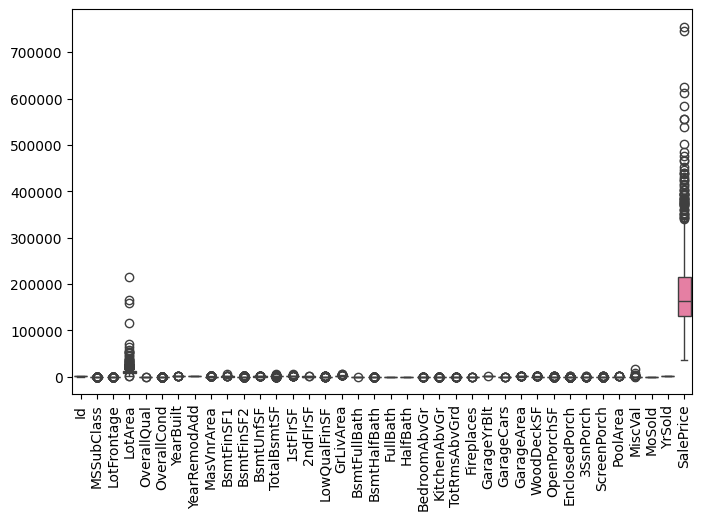

In [231]:
sns.boxplot(data=df1)
plt.xticks(rotation=90)

In [232]:
def wisker(col):
   q1=df1[col].quantile(0.25)
   q3=df1[col].quantile(0.75)
   iqr=q3-q1
   lower=q1-(1.5*iqr)
   upper=q3+(1.5*iqr)
   return lower,upper

In [233]:
for i in df1.select_dtypes(include=['number']).columns:
  lower,upper=wisker(i)
  df1[i]=np.where(df1[i]<lower,lower,df1[i])   
  df1[i]=np.where(df1[i]>upper,upper,df1[i])

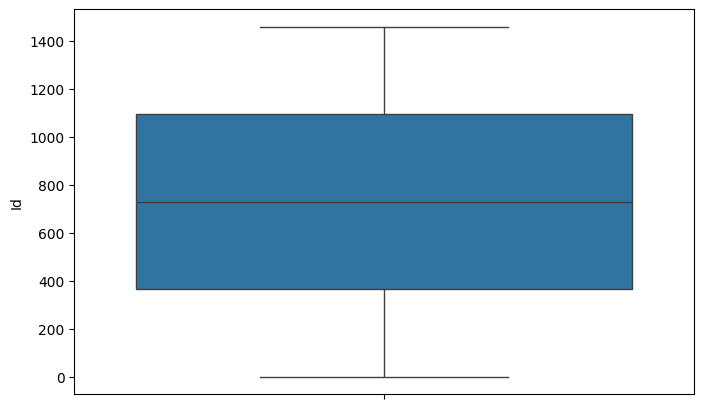

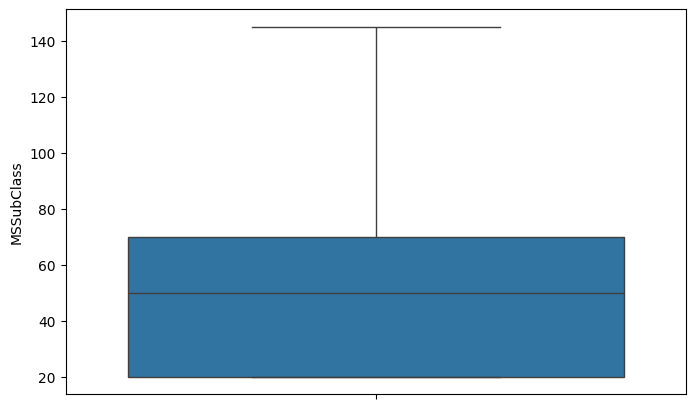

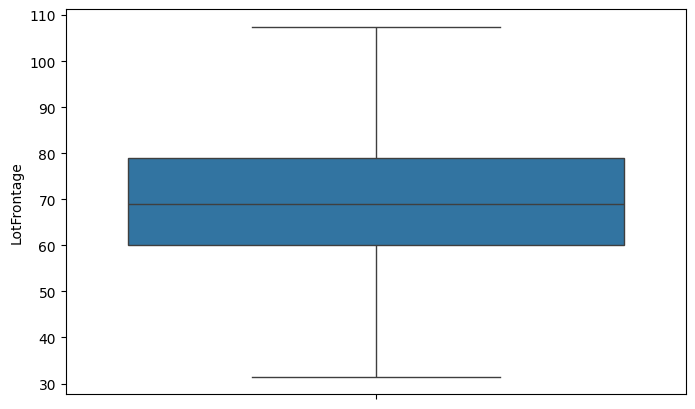

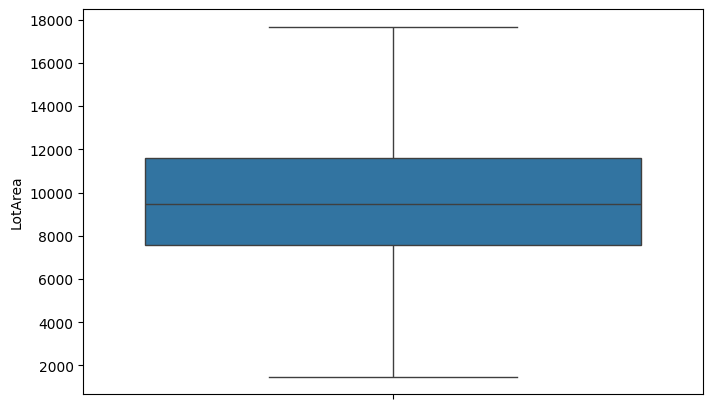

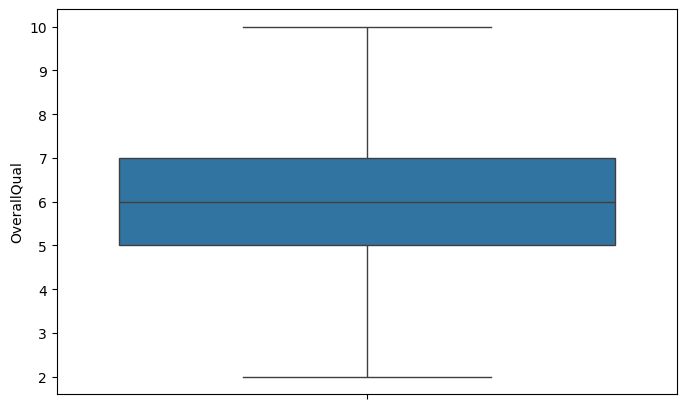

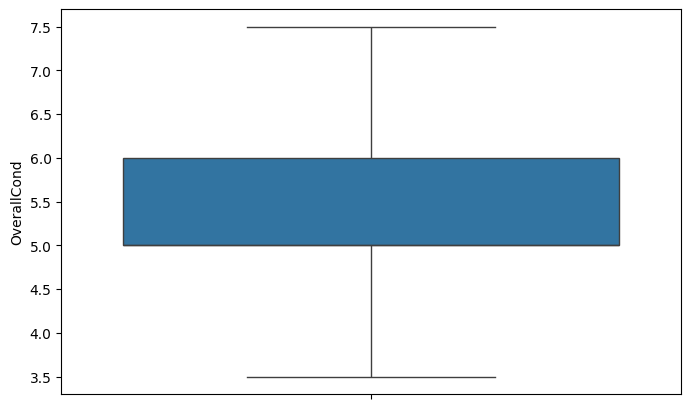

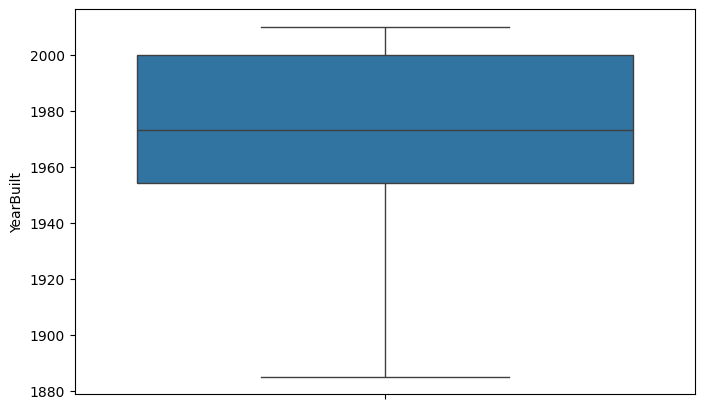

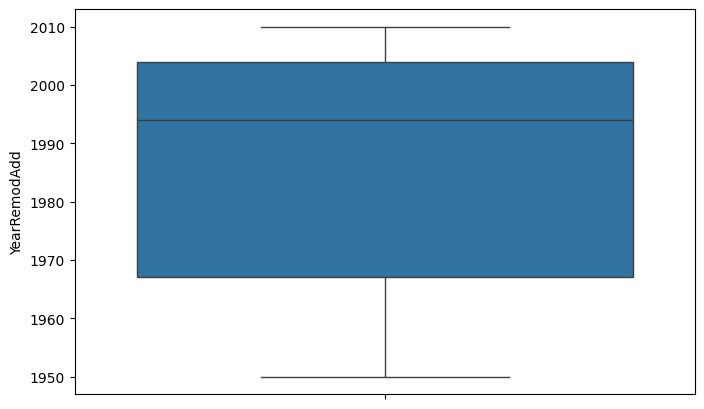

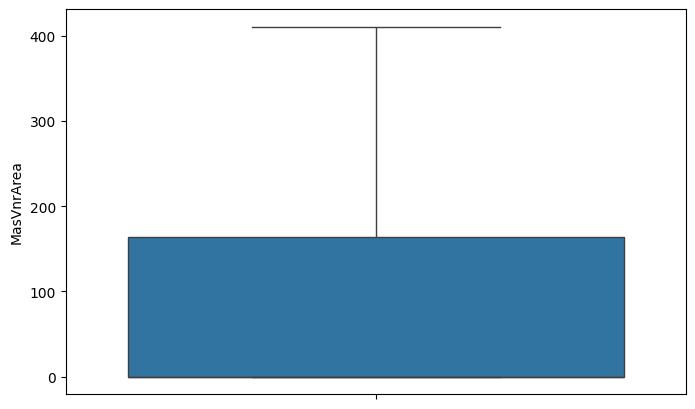

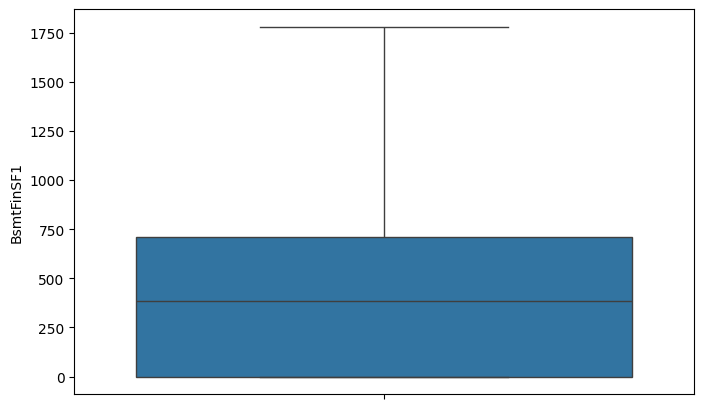

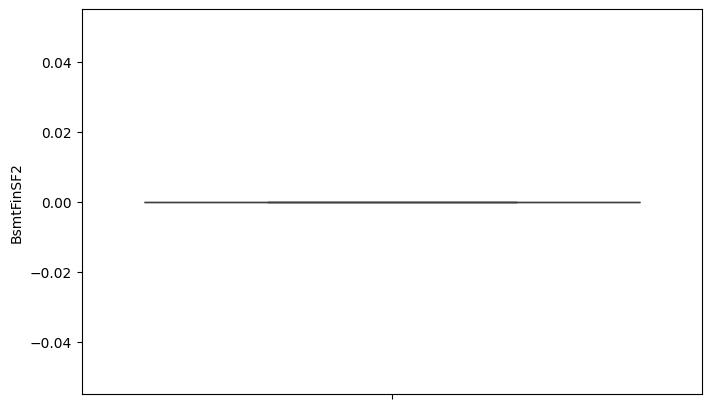

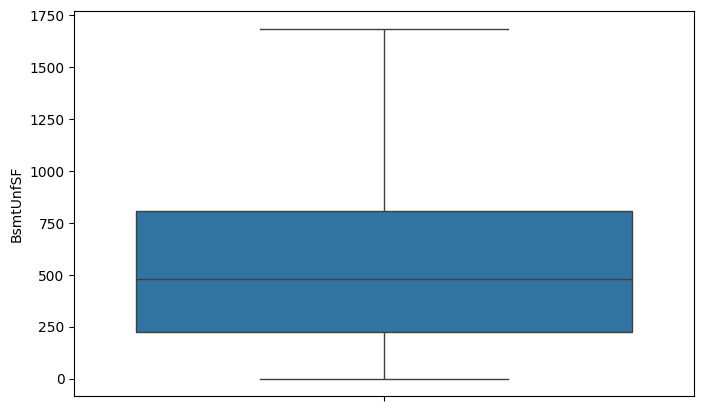

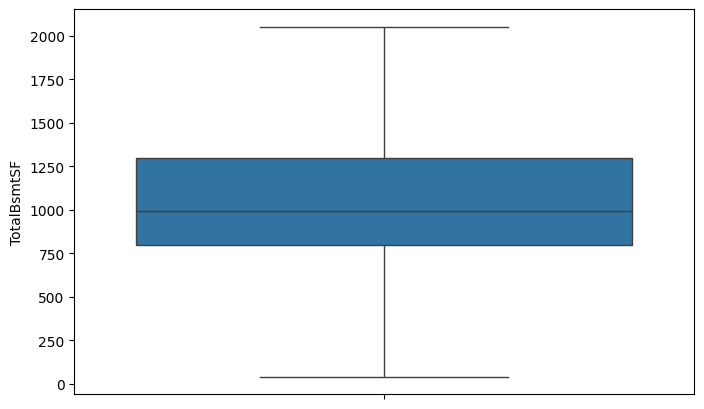

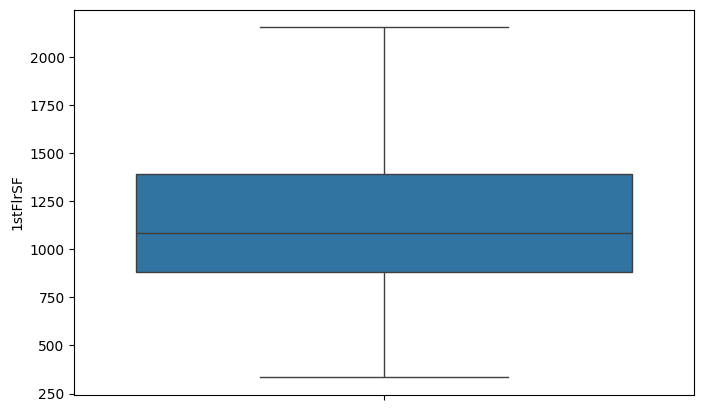

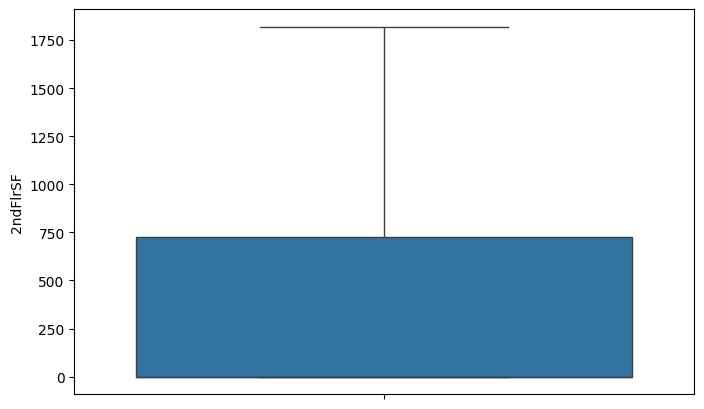

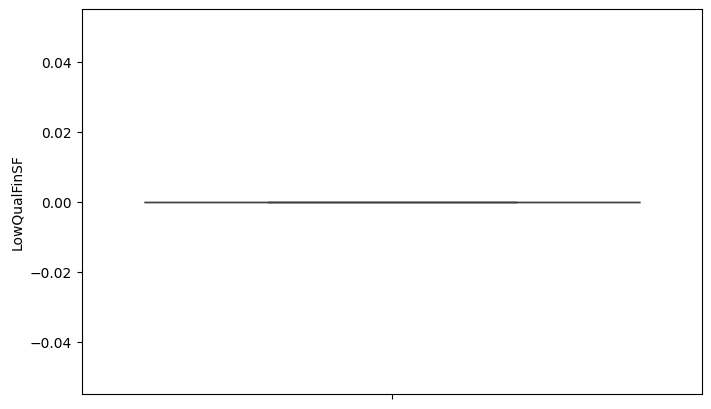

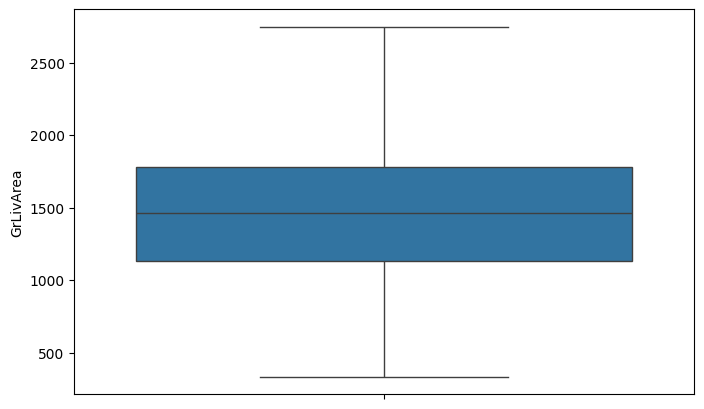

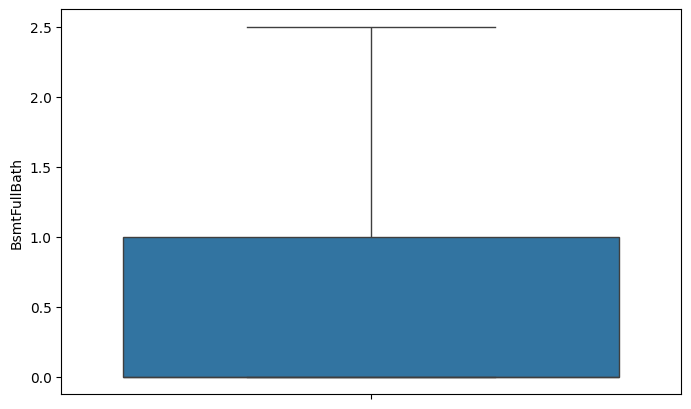

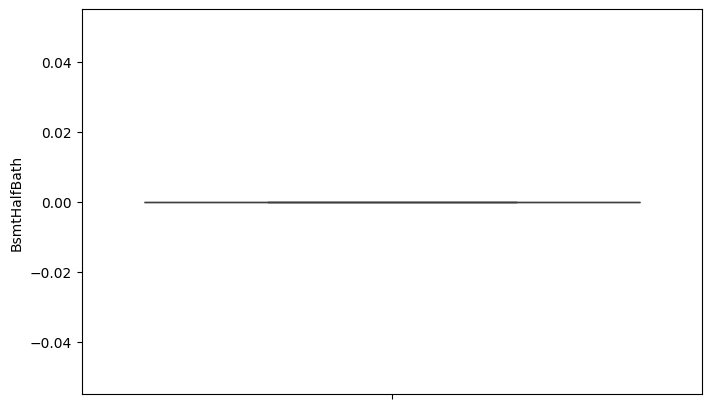

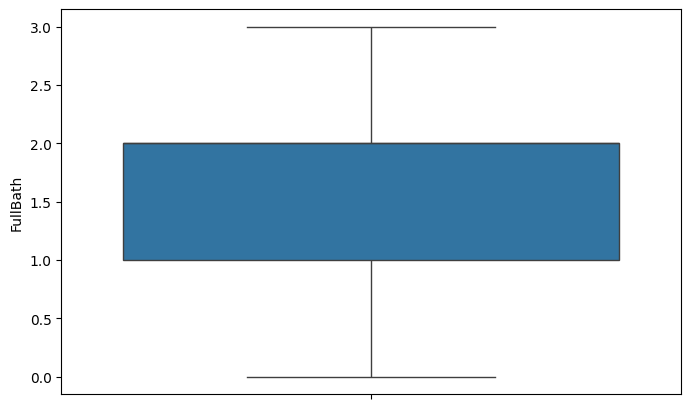

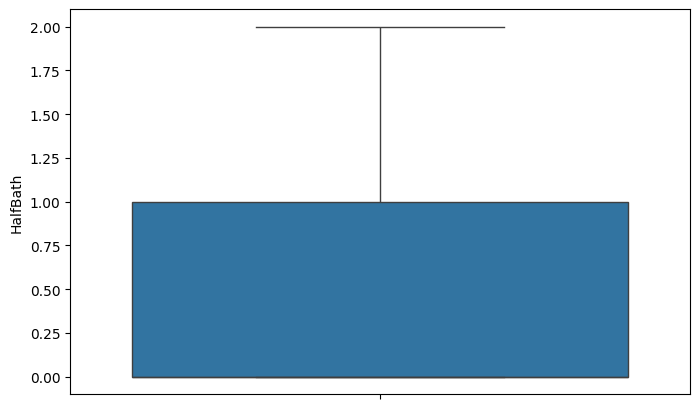

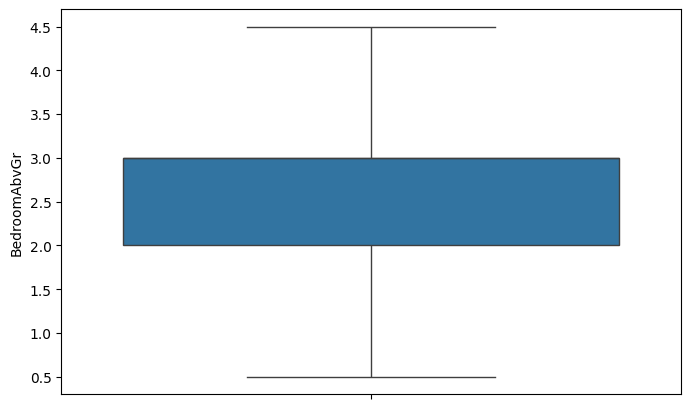

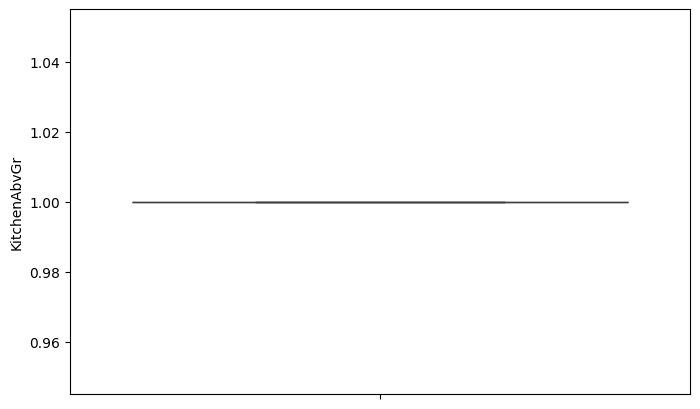

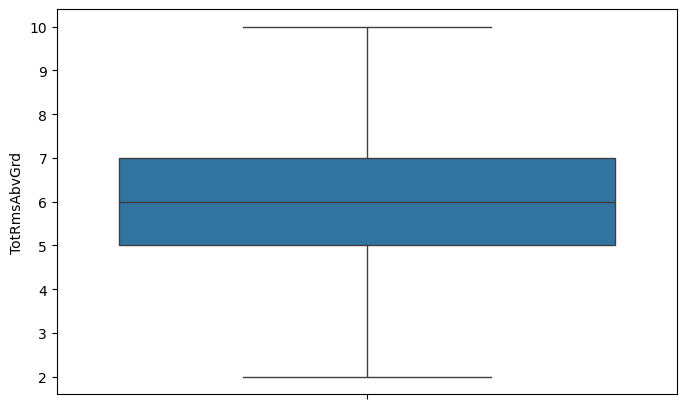

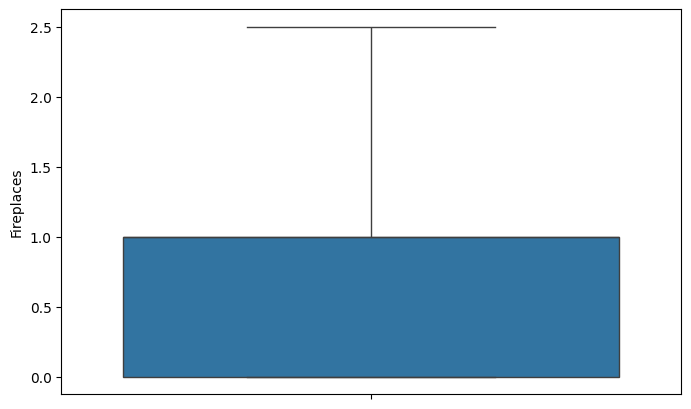

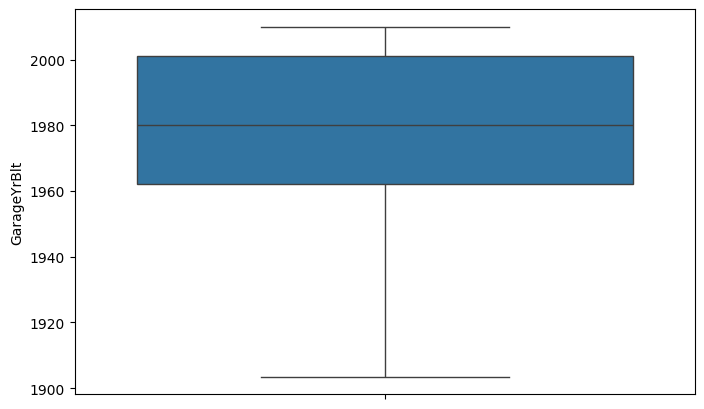

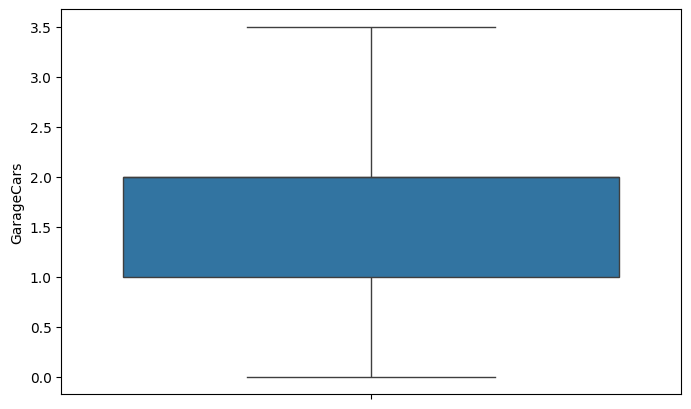

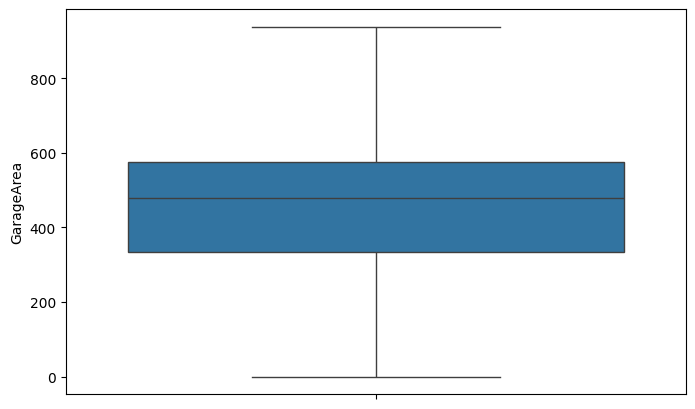

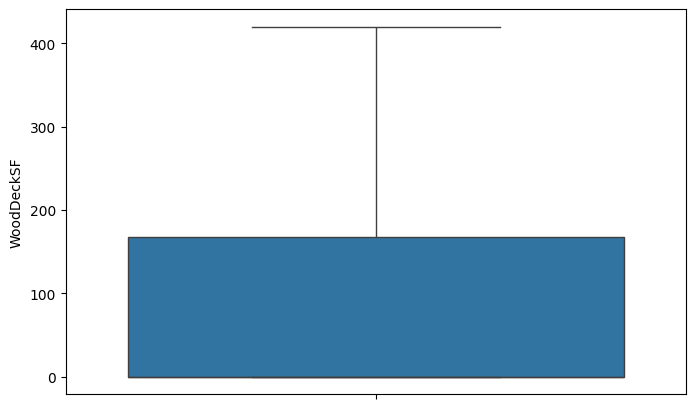

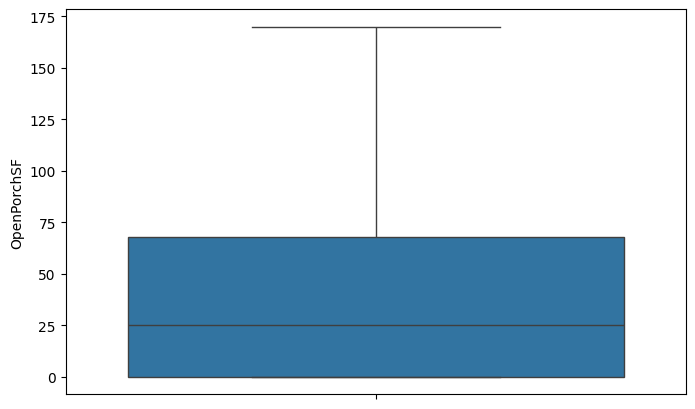

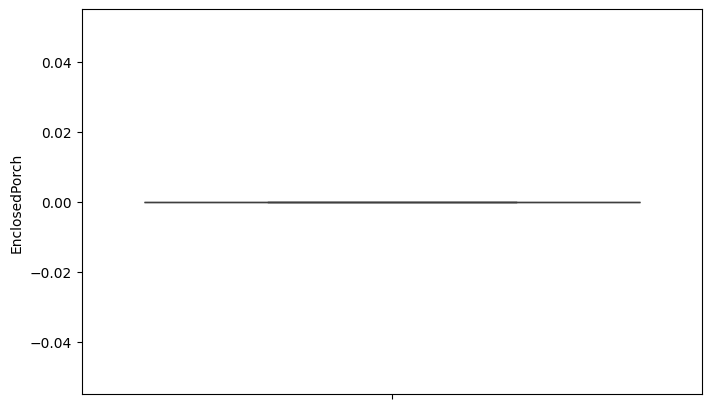

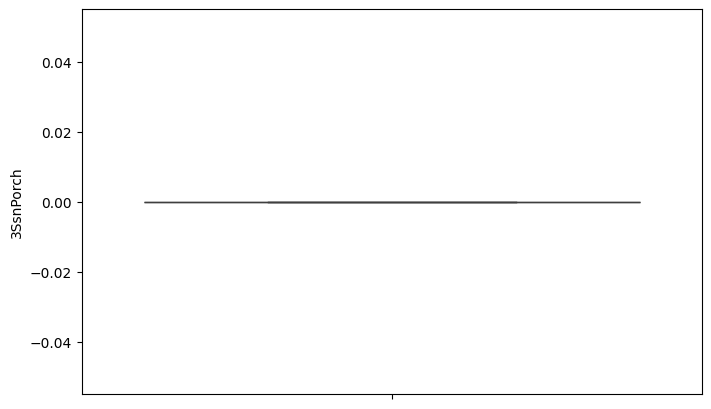

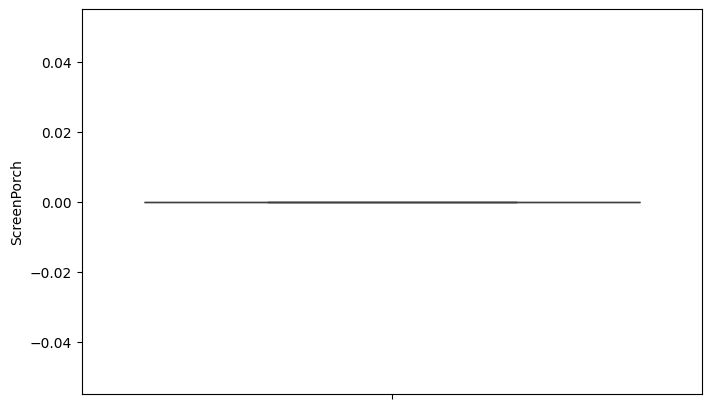

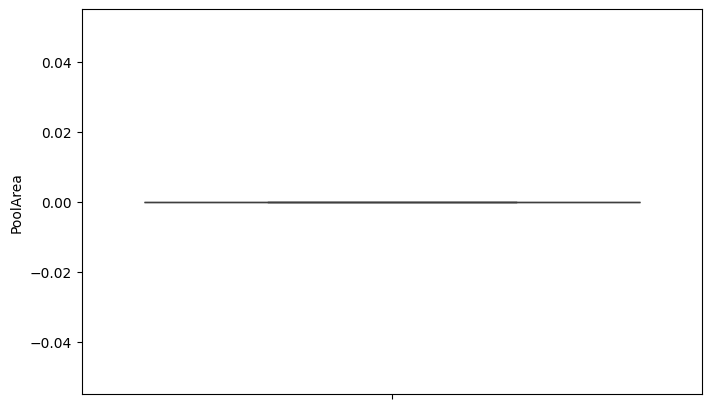

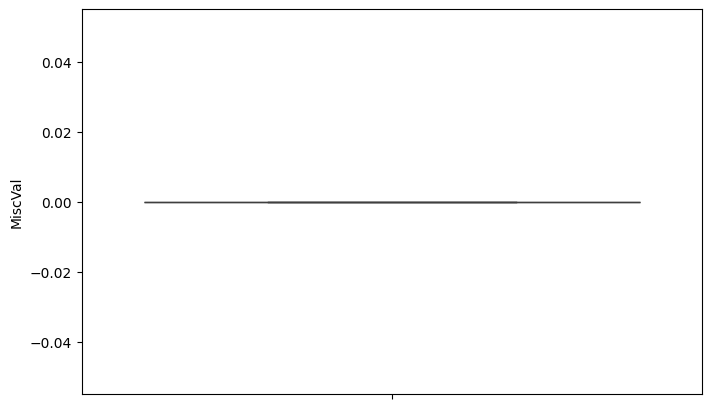

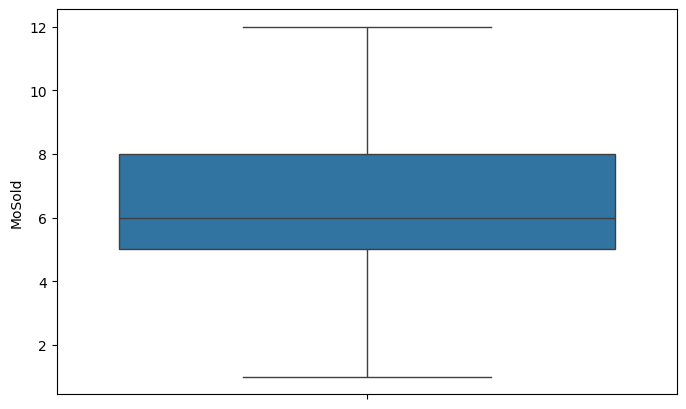

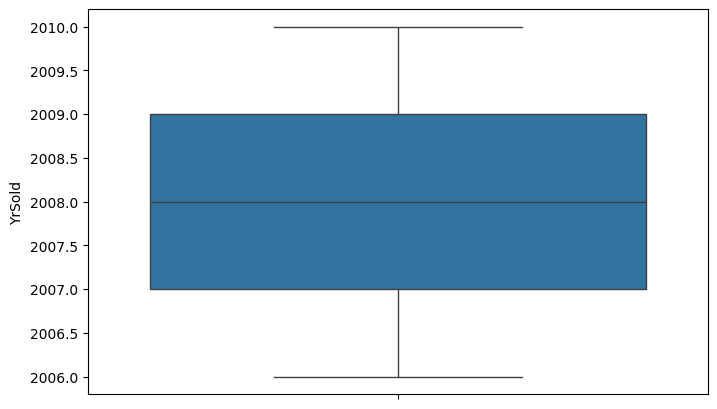

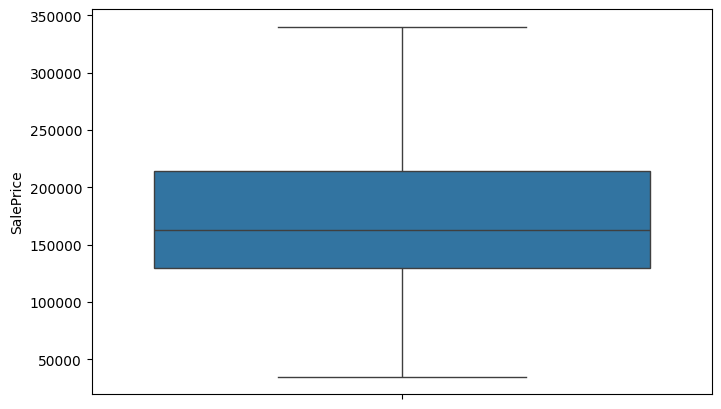

In [234]:
for col in numerical_col.select_dtypes(include="number").columns:
  sns.boxplot(df1[col])
  plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'Id'),
  Text(1, 0, 'MSSubClass'),
  Text(2, 0, 'LotFrontage'),
  Text(3, 0, 'LotArea'),
  Text(4, 0, 'OverallQual'),
  Text(5, 0, 'OverallCond'),
  Text(6, 0, 'YearBuilt'),
  Text(7, 0, 'YearRemodAdd'),
  Text(8, 0, 'MasVnrArea'),
  Text(9, 0, 'BsmtFinSF1'),
  Text(10, 0, 'BsmtFinSF2'),
  Text(11, 0, 'BsmtUnfSF'),
  Text(12, 0, 'TotalBsmtSF'),
  Text(13, 0, '1stFlrSF'),
  Text(14, 0, '2ndFlrSF'),
  Text(15, 0, 'LowQualFinSF'),
  Text(16, 0, 'GrLivArea'),
  Text(17, 0, 'BsmtFullBath'),
  Text(18, 0, 'BsmtHalfBath'),
  Text(19, 0, 'FullBath'),
  Text(20, 0, 'HalfBath'),
  Text(21, 0, 'BedroomAbvGr'),
  Text(22, 0, 'KitchenAbvGr'),
  Text(23, 0, 'TotRmsAbvGrd'),
  Text(24, 0, 'Fireplaces'),
  Text(25, 0, 'GarageYrBlt'),
  Text(26, 0, 'GarageCars'),
  Text(27, 

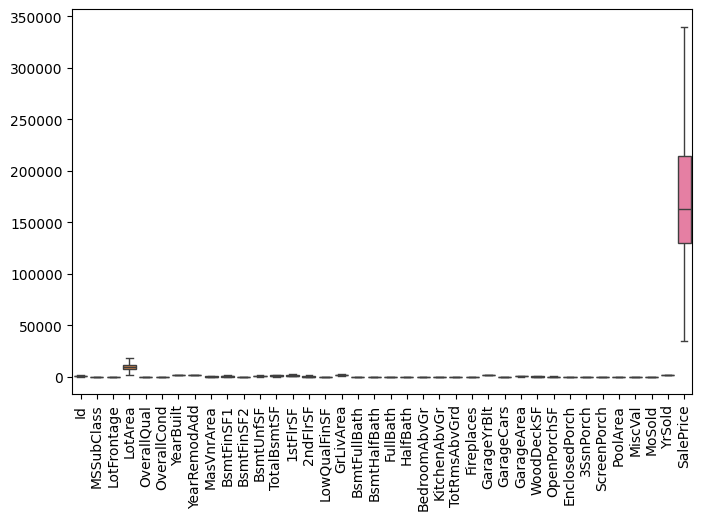

In [235]:
sns.boxplot(data=df1)
plt.xticks(rotation=90)

# one_hot Encoder

In [236]:
df2=pd.get_dummies(categorical_col,prefix='ONE',drop_first=True,dtype='int8')

In [237]:
df2.head()

,ONE_FV,ONE_RH,ONE_RL,ONE_RM,ONE_Pave,ONE_Pave,ONE_IR2,ONE_IR3,ONE_Reg,ONE_HLS,...,ONE_ConLI,ONE_ConLw,ONE_New,ONE_Oth,ONE_WD,ONE_AdjLand,ONE_Alloca,ONE_Family,ONE_Normal,ONE_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [238]:
df3=pd.concat([numerical_col,df2],axis=1)  
df3

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ONE_ConLI,ONE_ConLw,ONE_New,ONE_Oth,ONE_WD,ONE_AdjLand,ONE_Alloca,ONE_Family,ONE_Normal,ONE_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,1,0,0,0,1,0


In [239]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
numerical_cols = df2.select_dtypes(include=[np.number]).columns
categorical_cols = df2.select_dtypes(include=[object]).columns
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

In [240]:
df2.head()

,ONE_FV,ONE_RH,ONE_RL,ONE_RM,ONE_Pave,ONE_Pave,ONE_IR2,ONE_IR3,ONE_Reg,ONE_HLS,...,ONE_ConLI,ONE_ConLw,ONE_New,ONE_Oth,ONE_WD,ONE_AdjLand,ONE_Alloca,ONE_Family,ONE_Normal,ONE_Partial
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [241]:
#df_cleaned = df.drop(outliers_LotArea.index)

# Display the shape of the cleaned dataset to confirm the removal
#df_cleaned.shape

In [242]:
#cat=['LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour',
   #   ( 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
    #   'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
   #    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
  #     'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
 #      'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
 #      'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
#       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
#       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'])
#leb=LabelEncoder()
#for i in cat:
    #df2=pd.get_dummies(data=df,prefix="HOT",columns=cat,drop_first=True,dtype="int32")

In [243]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#numerical_cols = df2.select_dtypes(include=[np.number]).columns
#df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

In [244]:
df3=pd.concat([numerical_col,df2],axis=1)  
df3

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ONE_ConLI,ONE_ConLw,ONE_New,ONE_Oth,ONE_WD,ONE_AdjLand,ONE_Alloca,ONE_Family,ONE_Normal,ONE_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [268]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [269]:
df3.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ONE_ConLI,ONE_ConLw,ONE_New,ONE_Oth,ONE_WD,ONE_AdjLand,ONE_Alloca,ONE_Family,ONE_Normal,ONE_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [270]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = [8,5]

In [271]:
df3=pd.concat([numerical_col,df2],axis=1)  
df3

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ONE_ConLI,ONE_ConLw,ONE_New,ONE_Oth,ONE_WD,ONE_AdjLand,ONE_Alloca,ONE_Family,ONE_Normal,ONE_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [272]:
x = df3.drop(['SalePrice'],axis=1) #input features
y = df3['SalePrice'] # target variable

In [273]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [274]:
df3.shape

(1460, 246)

In [275]:
x_train.shape

(1168, 245)

In [276]:
x_test.shape

(292, 245)

In [277]:
lin_reg=LinearRegression()

In [278]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [279]:
lin_reg.coef_

array([ 5.41749985e-01,  1.35806709e+01,  1.21255457e+01,  6.68096233e-01,
        6.54783070e+03,  5.81711900e+03,  3.12329721e+02,  1.35180687e+02,
        1.83676736e+01,  1.68548958e+01,  6.72128446e+00, -1.48023432e+00,
        2.20962656e+01,  1.63911205e+01,  3.27980450e+01, -2.38577420e+01,
        2.53314011e+01,  1.71652729e+03, -2.40508393e+03,  2.88981654e+03,
        2.16734202e+03, -2.61216006e+03, -1.24090922e+04,  1.87583980e+03,
        2.85729045e+03,  2.16058864e+01,  3.90391994e+02,  2.62591080e+01,
        1.68196226e+01,  4.24127295e-02, -5.82942580e+00,  4.85881560e+01,
        3.25125878e+01,  8.17528555e+01,  1.95196807e+00, -4.43019113e+02,
       -3.44503613e+02,  2.88177017e+04,  1.93095304e+04,  2.01853611e+04,
        1.87263760e+04,  2.23504149e+04,  4.86724220e+03,  7.57925367e+03,
        7.54097731e+03,  1.81132502e+03,  1.45690743e+04, -6.14326490e+03,
        5.43936450e+03, -3.35166283e+04,  9.82097273e+03, -7.01678612e+03,
       -2.29146087e+04, -

In [280]:
lin_reg.intercept_

-868539.9949086948

In [281]:
y_pred=lin_reg.predict(x_test)
y_pred

array([ 157784.94899379,  349289.18057901,   86449.66505144,
        174007.55743908,  317396.24983959,   66731.08873336,
        235626.50804407,  146348.05012125,   57726.41947873,
        153865.3842789 ,  144415.26433111,  105521.09000665,
         81147.02516976,  220449.98945202,  173961.2467153 ,
        133377.34897112,  186441.05219015,  128730.80955711,
        130222.58908039,  216606.74329418,  148558.83041637,
        204266.36616535,  170735.30582817,  128172.59143866,
        197209.07432342,  134988.49153463,  191531.07871662,
        101405.4401173 ,  175292.97755754,  204023.66435114,
        170256.96807204,  277764.31474711,  240162.79479014,
        109553.53514318,  237289.32823306,  151466.5707469 ,
        128953.54924896,  200668.64574163,  308546.05566373,
        106097.52364912,  116825.01888916,  218884.9131353 ,
        101862.28885676,  371664.67927792,  132679.67003429,
        142580.6982892 ,   96897.77387284,  139910.083231  ,
        424977.06713199,

In [282]:
mean_squared_error(y_pred,y_test)

2642483715.1941304

In [283]:
r2_score(y_pred,y_test)

0.672485253227513

In [284]:
import mlflow

In [81]:
import os
os.environ["git_python_refresh"]="quiet"
os.environ["mlflow_tracking_uri"]="file:///Users/user/OneDrive/Desktop/mlflow"

In [46]:
mlflow.set_experiment("SalePrice-analysis")
mlflow.set_experiment_tag("SalePrice-tag","ex1")

In [47]:
with mlflow.start_run():
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

     # model object initialization
    RandFor = RandomForestRegressor(n_estimators=5000, max_depth=6)
    GBM = GradientBoostingRegressor(n_estimators=3000, max_depth=6, learning_rate=0.01, min_samples_split=5)
    LinReg = LinearRegression()

    rf_n_estimators = 5000
    
    # logging parameters
    mlflow.log_param("rf_n_estimators", rf_n_estimators)
    mlflow.log_param('rf_max_depth', 6)
    mlflow.log_param('gbm_n_estimators', 3000)
    mlflow.log_param('gbm_max_depth', 6)
    mlflow.log_param('gbm_learning_rate', 0.01)
    mlflow.log_param('gbm_minimum_samples_split', 5)

    # training models
    rf = RandFor.fit(x_train, y_train)
    gbm = GBM.fit(x_train, y_train)
    lr = LinReg.fit(x_train, y_train)
 # training scores
    training_score_rf = rf.score(x_train, y_train)
    training_score_gbm = gbm.score(x_train, y_train)
    training_score_lr = lr.score(x_train, y_train)
    
    # logging training scores
    mlflow.log_metric("rf_training_score_r2", training_score_rf)
    mlflow.log_metric("gbm_training_score_r2", training_score_gbm)
    mlflow.log_metric("lr_training_score_r2", training_score_lr)

    # value predictions
    y_pred_rf = rf.predict(x_test)
    y_pred_gbm = gbm.predict(x_test)
    y_pred_lr = lr.predict(x_test)

    # prediction evaluations
    testing_score_rf = r2_score(y_test, y_pred_rf)
    testing_score_gbm = r2_score(y_test, y_pred_gbm)
    testing_score_lr = r2_score(y_test, y_pred_lr)
    
    # logging evaluation scores
    mlflow.log_metric("rf_testing_score_r2", testing_score_rf)
    mlflow.log_metric("gbm_testing_score_r2", testing_score_gbm)
    mlflow.log_metric("lr_testing_score_r2", testing_score_lr)
    # training metrics
    rf_train_mse = mean_squared_error(y_train, rf.predict(x_train))
    gbm_train_mse = mean_squared_error(y_train, gbm.predict(x_train))
    lr_train_mse = mean_squared_error(y_train, lr.predict(x_train))
    
    rf_train_mae = mean_absolute_error(y_train, rf.predict(x_train))
    gbm_train_mae = mean_absolute_error(y_train, gbm.predict(x_train))
    lr_train_mae = mean_absolute_error(y_train, lr.predict(x_train))

    # logging training metrics
    mlflow.log_metric("rf_training_mse", rf_train_mse)
    mlflow.log_metric("gbm_training_mse", gbm_train_mse)
    mlflow.log_metric("lr_training_mse", lr_train_mse)
    
    mlflow.log_metric("rf_training_mae", rf_train_mae)
    mlflow.log_metric("gbm_training_mae", gbm_train_mae)
    mlflow.log_metric("lr_training_mae", lr_train_mae)

    # testing metrics
    rf_test_mse = mean_squared_error(y_test, y_pred_rf)
    gbm_test_mse = mean_squared_error(y_test, y_pred_gbm)
    lr_test_mse = mean_squared_error(y_test, y_pred_lr)
    
    rf_test_mae = mean_absolute_error(y_test, y_pred_rf)
    gbm_test_mae = mean_absolute_error(y_test, y_pred_gbm)
    lr_test_mae = mean_absolute_error(y_test, y_pred_lr)
# logging testing metrics
    mlflow.log_metric("rf_testing_mse", rf_test_mse)
    mlflow.log_metric("gbm_testing_mse", gbm_test_mse)
    mlflow.log_metric("lr_testing_mse", lr_test_mse)
    
    mlflow.log_metric("rf_testing_mae", rf_test_mae)
    mlflow.log_metric("gbm_testing_mae", gbm_test_mae)
    mlflow.log_metric("lr_testing_mae", lr_test_mae)
    
    # logging models
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")
    mlflow.sklearn.log_model(lr, "linear-regression-model")

C:\Users\user\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [48]:
import requests
import json
import pandas as pd


df2={'dataframe_records': pd.DataFrame(x_test).values.tolist()}
headers={"Content-Type": "application/json"}

response = requests.post("http://localhost:8102/invocations",data=json.dumps(data),headers=headers)
predictions = response.json()

print(predictions)

NameError: name 'data' is not defined